In [1]:
from google.colab import files
df = files.upload()

Saving listings.csv to listings.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import io
import seaborn as sns

In [3]:
myListings = pd.read_csv(io.StringIO(df['listings.csv'].decode('utf-8')))

In [4]:
myListings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15542 entries, 0 to 15541
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15542 non-null  int64  
 1   listing_url                                   15542 non-null  object 
 2   name                                          15541 non-null  object 
 3   description                                   14988 non-null  object 
 4   neighborhood_overview                         9703 non-null   object 
 5   picture_url                                   15542 non-null  object 
 6   host_id                                       15542 non-null  int64  
 7   host_url                                      15542 non-null  object 
 8   host_name                                     15125 non-null  object 
 9   host_since                                    15125 non-null 

Data cleaning and EDA

In [5]:
#deleting irrelevant attributes
myListings = myListings.drop(columns=['name', 'listing_url','picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 
                         'host_picture_url', 'host_neighbourhood', 'host_location', 'host_total_listings_count', 'neighbourhood', 'host_listings_count',
                         'property_type', 'bathrooms', 'maximum_nights','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
                         'calendar_last_scraped', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                         'calculated_host_listings_count_shared_rooms', 'license', 'has_availability', 'availability_30', 'availability_60', 
                         'availability_90', 'neighborhood_overview', 'description', 'latitude', 'longitude'])

In [6]:
#converting the price to numeric
myListings.price = myListings.price.str.replace('$','')
myListings.price = myListings.price.str.replace(',','')
myListings.price = myListings.price.astype(float)

In [7]:
#converting 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', and 'instant_bookable' columns to boolean
myListings.host_is_superhost = myListings.host_is_superhost.replace({'t': 1, 'f': 0})
myListings.host_has_profile_pic = myListings.host_has_profile_pic.replace({'t': 1, 'f': 0})
myListings.host_identity_verified = myListings.host_identity_verified.replace({'t': 1, 'f': 0})
myListings.instant_bookable = myListings.instant_bookable.replace({'t': 1, 'f': 0})


In [8]:
#converting 'host_since', 'first_review' 'last_review' to datetime
from datetime import datetime
myListings.host_since = pd.to_datetime(myListings.host_since)
myListings.last_review = pd.to_datetime(myListings.last_review)
myListings.first_review = pd.to_datetime(myListings.first_review)

In [9]:
#removing the listings for which the last review was posted before 2019, chances are high that these ones are inactive
myListings = myListings[myListings.last_review  > '2019-01-01']

The 3 variables 'host_response_time', 'host_response_rate', and 'host_acceptance_rate' are highly correlated and may even define the superhost status. Therefore, they will be eliminated.

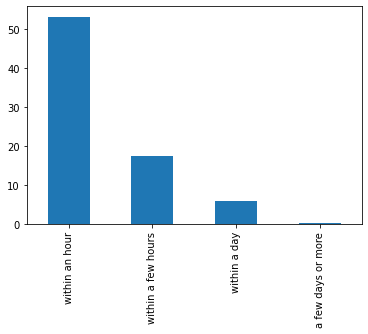

In [10]:
#relationship between superhost status and host_response_time
(myListings[myListings.host_is_superhost==1]['host_response_time'].value_counts()*100/sum(myListings.host_is_superhost==1)).plot(kind='bar')

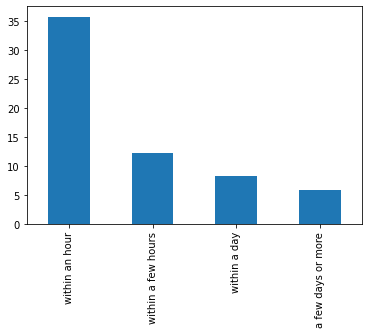

In [11]:
(myListings[myListings.host_is_superhost==0]['host_response_time'].value_counts()*100/sum(myListings.host_is_superhost==0)).plot(kind='bar')

In [12]:
#removing the 3 variables 'host_response_time', 'host_response_rate', and 'host_acceptance_rate'
myListings = myListings.drop(columns=['host_response_time', 'host_response_rate', 'host_acceptance_rate'])

Text(0.5, 0, 'Listing price in $')

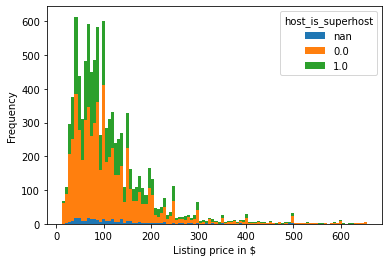

In [14]:
#price distribution depending on whether the host is superhost
myListings.loc[(myListings.price <= 655)].pivot(columns = 'host_is_superhost', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $')

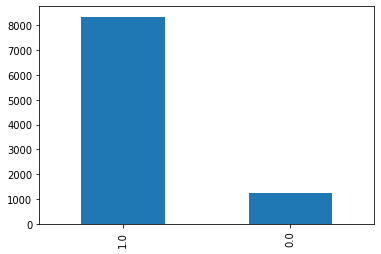

In [15]:
#checking the distribution of host_identity_verified
myListings['host_identity_verified'].value_counts().plot(kind='bar')

In [16]:
#Almost 90% of the listings have the identity of their owners verified => removing 'host_identity_verified' + 'host_verifications'
myListings = myListings.drop(columns=['host_identity_verified', 'host_verifications'])

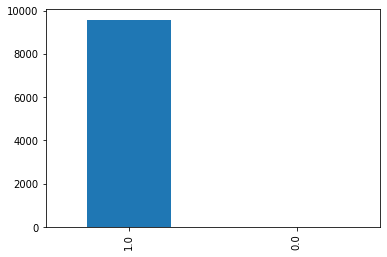

In [17]:
#checking the distribution of host_has_profile_pic
myListings['host_has_profile_pic'].value_counts().plot(kind='bar')

In [18]:
#removing host_has_profile_pic
myListings = myListings.drop(columns=['host_has_profile_pic'])

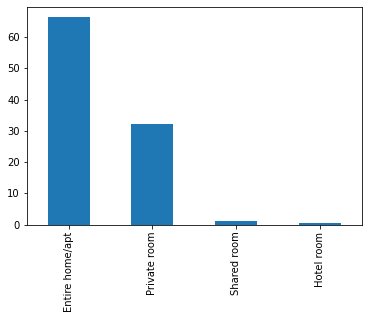

In [19]:
(myListings['room_type'].value_counts()*100/len(myListings)).plot(kind='bar')

In [20]:
#removing room type : hotel room 
myListings = myListings.query("room_type != 'Hotel room'")

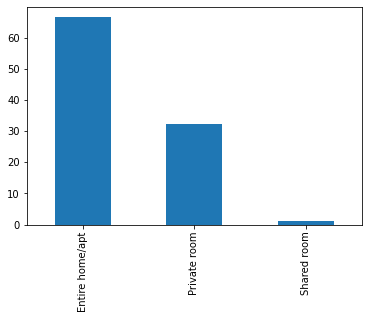

In [21]:
(myListings['room_type'].value_counts()*100/len(myListings)).plot(kind='bar')

Text(0.5, 0, 'Listing price in $')

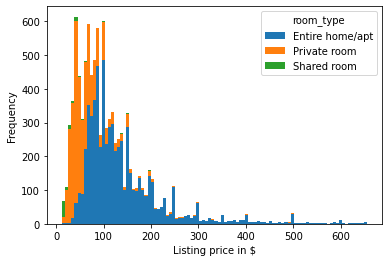

In [22]:
#price distribution depending on the listing type (entire unit, private room, shared room)
myListings.loc[(myListings.price <= 655)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $')

In [ ]:
#OneHot encoding of 'room_type' 
myListings_oneHot = myListings.copy()
myListings_oneHot = pd.get_dummies(myListings_oneHot, columns=["room_type"], prefix=['room_type'])